# Predicting the Success of a Bank Telemarketing Campaign

## About the database

We will use the bank-additional database since according to the UCI website, is the most approximate to the one used by [Moro et al., 2014] article. 

### Introduction

  The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

------

###Source 
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

---

### Atributes

Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

---

## Importing libraries and database

In [1]:
#basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
from sklearn.metrics import confusion_matrix, classification_report

dataset = pd.read_csv('bank-additional.csv', sep = ';')
df = dataset.copy()
dataset = dataset.dropna(how = 'any')
dataset.head() #checking if import was successful

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As it's noted in dataset description, we will be droping the Duration attribute due to heavily affecting the model, but this metric can only be known after the call is made, so for prediction purposes shouldn't be considered. 

In [4]:
dataset.drop(columns = 'duration', inplace = True)

### Scaling numeric variables

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('ct', StandardScaler(), ['campaign', 'pdays', 'previous'])], remainder='passthrough')

ct.fit_transform(dataset)


array([[-0.5659219741930245, 0.1954139001271294, -0.34949428419757467,
        ..., 4.857, 5191.0, 'no'],
       [-0.5659219741930245, 0.1954139001271294, -0.34949428419757467,
        ..., 4.857, 5191.0, 'no'],
       [-0.5659219741930245, 0.1954139001271294, -0.34949428419757467,
        ..., 4.857, 5191.0, 'no'],
       ...,
       [-0.2049085263557372, 0.1954139001271294, -0.34949428419757467,
        ..., 1.028, 4963.6, 'no'],
       [-0.5659219741930245, 0.1954139001271294, -0.34949428419757467,
        ..., 1.028, 4963.6, 'yes'],
       [0.15610492148155006, 0.1954139001271294, 1.6711360607672916, ...,
        1.028, 4963.6, 'no']], dtype=object)

### Encoding Categorical variables

In [6]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
dataset_encoded = dataset.copy()
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
le = LabelEncoder()

dataset_encoded['y'] = le.fit_transform(dataset_encoded['y'])
col_y = dataset_encoded.pop('y')
dataset_encoded['y'] = col_y

In [7]:
dataset_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


## Separating Training and Test sets

In [9]:
X = dataset_encoded.iloc[:, :-1].values
y = dataset_encoded.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = dataset_encoded['y'])

---

## Exploratory Data Analysis

### Overview of customer base caracteristics

In [8]:

print('Customer base grouped by marital status: \n', df.groupby('marital').y.count(), '\n')

print('Customer base grouped by profession: \n', df.groupby('job').y.count(), '\n')

print('Customer base grouped by educational level: \n', df.groupby('education').y.count(), '\n')

Customer base grouped by marital status: 
 marital
divorced     4612
married     24928
single      11568
unknown        80
Name: y, dtype: int64 

Customer base grouped by profession: 
 job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: y, dtype: int64 

Customer base grouped by educational level: 
 education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: y, dtype: int64 



---

### Correlation Matrix of the variables

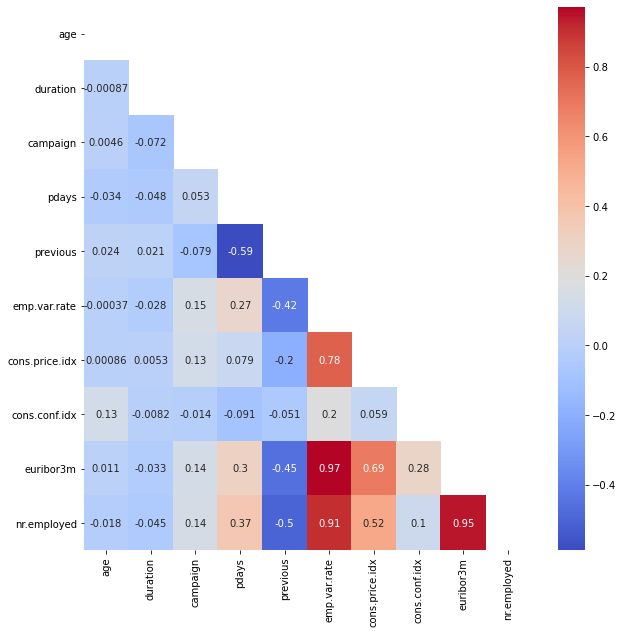

In [6]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
corr = df.corr()
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, fmt='.2g')

plt.show()

Trough vizualizing the correlation heat map, you can conclude what is already expected from this type of variables, macroeconomic metrics are highly correlated. But we can't extract, for now, no relation with the profile of the customers contacted or probabilty of success. 

---

### What is the general conversion rate of the campaign?

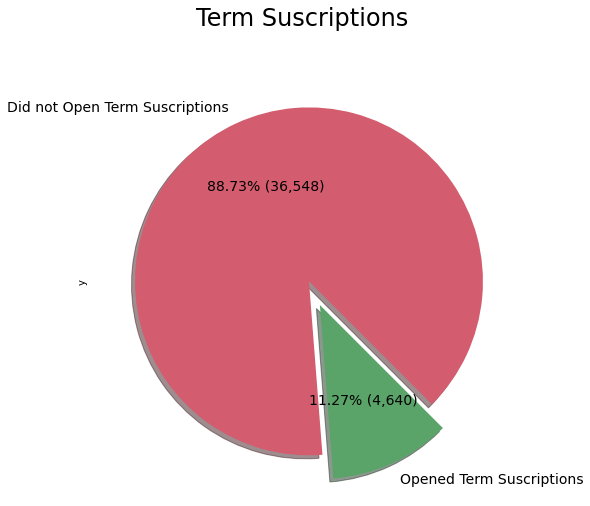

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

color_dict = {'yes': '#5AA469', 'no': '#D35D6E'} #to use in Seaborn graphs
colors = ["#D35D6E", "#5AA469"] #to use as matplotlib graphs

labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

df["y"].value_counts().plot.pie(explode=[0,0.15], autopct = lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(df["y"].value_counts())/100), shadow=True, colors=colors, labels=labels, fontsize=14, startangle=-45)
plt.suptitle('Term Suscriptions', fontsize=24)

plt.show()

We can see that this dataset is heavily imbalanced towards 'no'. That's expected for convertion rates of cold calling campaigns.

> But still, it's important to take that in consideration at the modelling part, as this will heavily impact the classifier results



---

### What is the relation between age and conversion rate?

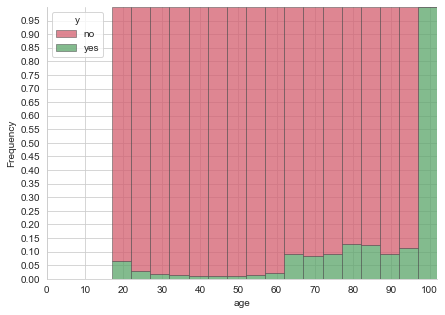

In [109]:
import matplotlib as mpl
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=df,
    x="age", hue="y",
    multiple="fill",
    palette=color_dict,
    edgecolor=".3",
    linewidth=.5,
    stat='frequency',
    binwidth=5
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(np.arange(0,110,10))
ax.set_yticks(np.arange(0,1,0.05))

plt.show()

It seems that customers with 65+ years are more prone to accept the subscription term. 
Notably, customers between 25 and 60 years don't seem to be interest in the product.

---

### Does people of a work sector tend have greater chance to subscribe to the terms?

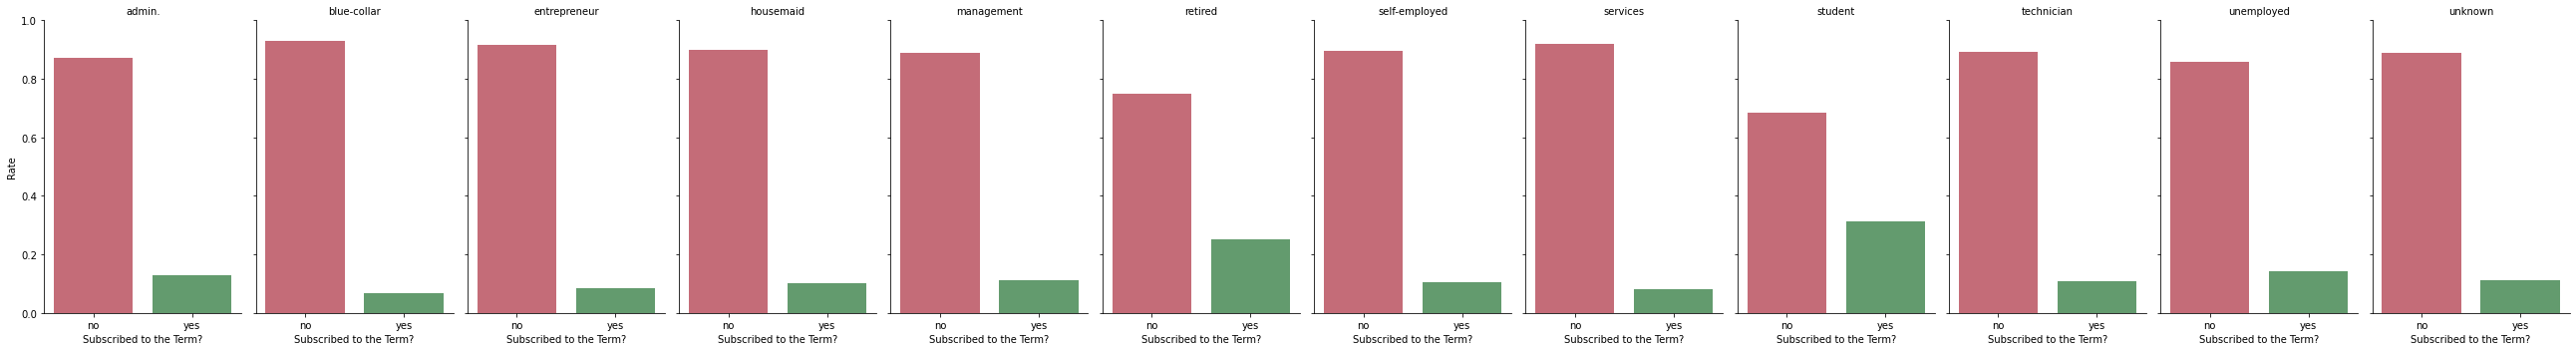

In [11]:
#@title
job_count = df.groupby(['job','y'], as_index=True)['y'].count().reset_index(name ='Count') #generate new dataframe adding a column called 'Count' wich is the result of groupby() method
job_count['Normalized'] = job_count['Count']/job_count.groupby('job').Count.transform('sum') #create new column called "Normalized" which is the 'Count' column value normalized for 'job' and 'y' values

g = sns.catplot(x='y',y='Normalized',  data=job_count,
                kind='bar', aspect=.6, palette= colors, col = 'job')

(g.set_axis_labels("Subscribed to the Term?", "Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

plt.tight_layout()
plt.savefig('work_sector.jpg')#check content folder on colab for JPG file
plt.show()


In [12]:
#@title
pivot_job_count = job_count[job_count.y == 'yes'].sort_values(by = 'Normalized', ascending = False) #Displing only 'yes' results in descending order

print(pivot_job_count)
print("\n Mean Convertion rate: %.2f%%" % (pivot_job_count['Normalized'].mean()*100)) 


              job    y  Count  Normalized
17        student  yes    275    0.314286
11        retired  yes    434    0.252326
21     unemployed  yes    144    0.142012
1          admin.  yes   1352    0.129726
9      management  yes    328    0.112175
23        unknown  yes     37    0.112121
19     technician  yes    730    0.108260
13  self-employed  yes    149    0.104856
7       housemaid  yes    106    0.100000
5    entrepreneur  yes    124    0.085165
15       services  yes    323    0.081381
3     blue-collar  yes    638    0.068943

 Mean Convertion rate: 13.43%


As we can see, the groups: 'student' and 'retired' have convertion rates about the mean of the entire campaign, and are the work sector publics that should be prioritized.

---

### Do maried people are more prone to Sign the Subscription Term?

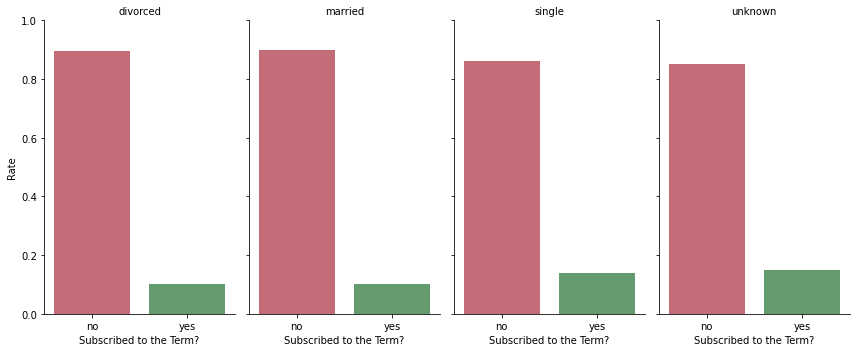

In [13]:
#@title
marital_count = df.groupby(['marital','y'], as_index=True)['y'].count().reset_index(name ='Count') #generate new dataframe adding a column called 'Count' wich is the result of groupby() method
marital_count['Normalized'] = marital_count['Count']/marital_count.groupby('marital').Count.transform('sum') #create new column called "Normalized" which is the 'Count' column value normalized for 'job' and 'y' values


g = sns.catplot(x='y',y='Normalized',  data=marital_count,
                kind='bar', aspect=.6, palette= colors, col = 'marital')
(g.set_axis_labels("Subscribed to the Term?", "Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

plt.tight_layout()
plt.savefig('marital_status.jpg')#check content folder on colab for JPG file
plt.show()

In [14]:
#@title
pivot_marital_count = marital_count[marital_count.y == 'yes'].sort_values(by = 'Normalized', ascending = False) #Displing only 'yes' results in descending order

print(pivot_marital_count)
print("\n Mean Convertion rate: %.2f%%" % (pivot_marital_count['Normalized'].mean()*100))

    marital    y  Count  Normalized
7   unknown  yes     12    0.150000
5    single  yes   1620    0.140041
1  divorced  yes    476    0.103209
3   married  yes   2532    0.101573

 Mean Convertion rate: 12.37%


Single customers have 30% more chance of subscribing to the term. This group should have more attention from the commercial team, but maried customers cannot be put aside due to being the marjority of the customer base and still having a average convertion rate. 

---

### Do people with a higher level of education tend to subscribe to the bank's services?

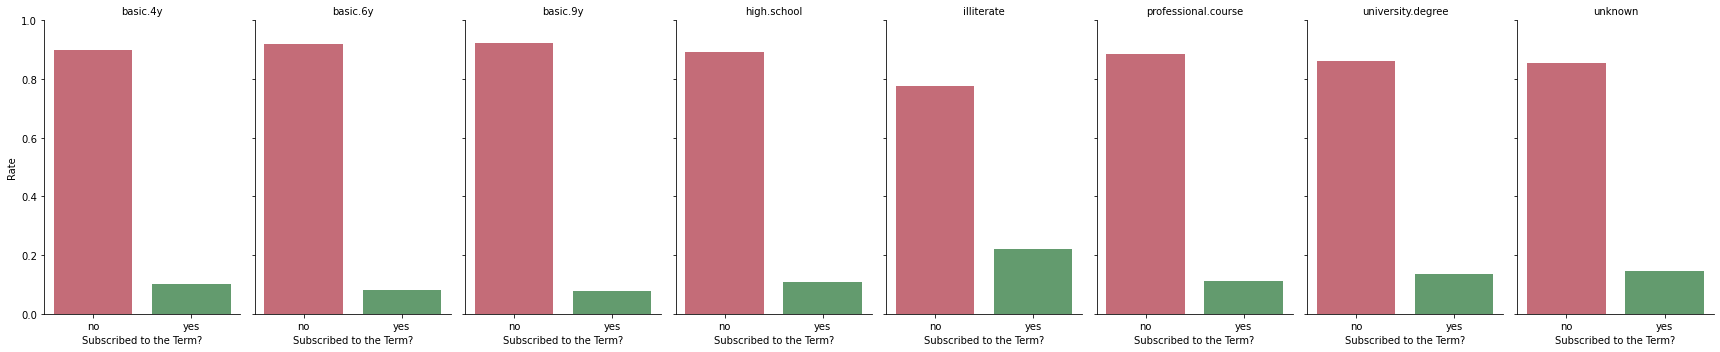

In [15]:

education_count = df.groupby(['education','y'], as_index=True)['y'].count().reset_index(name ='Count') #generate new dataframe adding a column called 'Count' wich is the result of groupby() method
education_count['Normalized'] = education_count['Count']/education_count.groupby('education').Count.transform('sum') #create new column called "Normalized" which is the 'Count' column value normalized for 'education' and 'y' values

g = sns.catplot(x='y',y='Normalized',  data=education_count,
                kind='bar', aspect=.6, palette= colors, col = 'education')

(g.set_axis_labels("Subscribed to the Term?", "Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

plt.tight_layout()
plt.savefig('education_level.jpg')#check 'content' folder on colab for JPG file
plt.show()

In [16]:
#@title
pivot_education_count = education_count[education_count.y == 'yes'].sort_values(by = 'Normalized', ascending = False) #Displing only 'yes' results in descending order

print(pivot_education_count)
print("\n Mean Convertion rate: %.2f%%" % (pivot_education_count['Normalized'].mean()*100))

              education    y  Count  Normalized
9            illiterate  yes      4    0.222222
15              unknown  yes    251    0.145003
13    university.degree  yes   1670    0.137245
11  professional.course  yes    595    0.113485
7           high.school  yes   1031    0.108355
1              basic.4y  yes    428    0.102490
3              basic.6y  yes    188    0.082024
5              basic.9y  yes    473    0.078246

 Mean Convertion rate: 12.36%


It seems that people with professional courses or university degrees have a greater chance of subscribing to the bank terms. 

---

### Does any weekday is easier to sell the subscription?

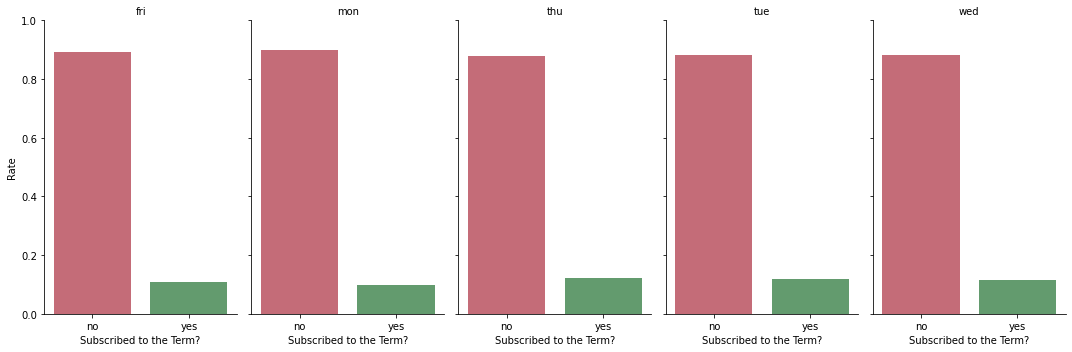

In [17]:
day_count = df.groupby(['day_of_week','y'], as_index=True)['y'].count().reset_index(name ='Count') #generate new dataframe adding a column called 'Count' wich is the result of groupby() method
day_count['Normalized'] = day_count['Count']/day_count.groupby('day_of_week').Count.transform('sum') #create new column called "Normalized" which is the 'Count' column value normalized for 'job' and 'y' values
day_count
g = sns.catplot(x='y',y='Normalized',  data=day_count, kind='bar', aspect=.6, palette= colors, col = 'day_of_week')

(g.set_axis_labels("Subscribed to the Term?", "Rate")
 .set_titles("{col_name}")
 .set(ylim=(0,1)))

plt.tight_layout()
plt.savefig('day_of_week.jpg')#check content folder on colab for JPG file
plt.show()

In [18]:
#@title
pivot_day_count = day_count[day_count.y == 'yes'].sort_values(by = 'Normalized', ascending = False) #Displing only 'yes' results in descending order

print(pivot_day_count)
print("\n Mean Convertion rate: %.2f%%" % (pivot_day_count['Normalized'].mean()*100))

  day_of_week    y  Count  Normalized
5         thu  yes   1045    0.121188
7         tue  yes    953    0.117800
9         wed  yes    949    0.116671
1         fri  yes    846    0.108087
3         mon  yes    847    0.099483

 Mean Convertion rate: 11.26%


It appears that no weekday is more succesful than other, so team scheduling should be equally divided trough the week. But it seems that mondays are well below average in convertion performance. 

> Due to the low significance of this variable, we should drop it from the dataset that we will build our model.

In [19]:
dataset.drop(columns='day_of_week', inplace = True)

---

### Does any month brings more subscriptions?

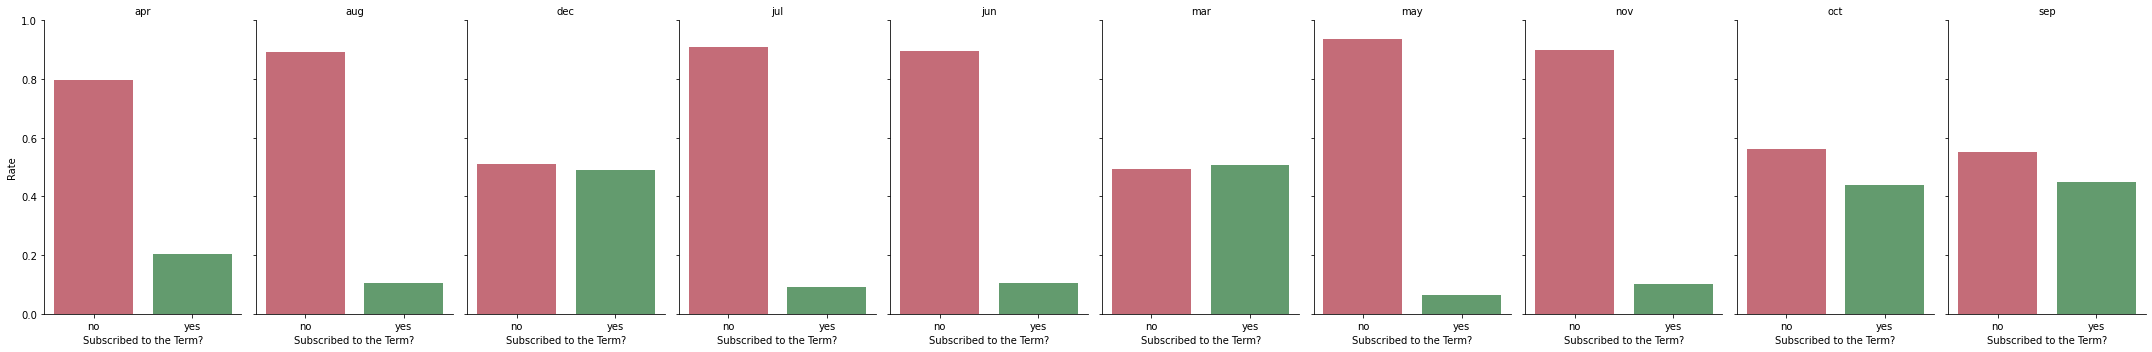

In [20]:
month_count = df.groupby(['month','y'], as_index=True)['y'].count().reset_index(name ='Count') #generate new dataframe adding a column called 'Count' wich is the result of groupby() method
month_count['Normalized'] = month_count['Count']/month_count.groupby('month').Count.transform('sum') #create new column called "Normalized" which is the 'Count' column value normalized for 'job' and 'y' values

g = sns.catplot(x='y',y='Normalized',  data=month_count,
                kind='bar', aspect=.6, palette= colors, col = 'month')

(g.set_axis_labels("Subscribed to the Term?", "Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

plt.tight_layout()
plt.savefig('month.jpg')#check content folder on colab for JPG file
plt.show()

In [21]:
#@title
pivot_month_count = month_count[month_count.y == 'yes'].sort_values(by = 'Normalized', ascending = False) #Displing only 'yes' results in descending order

print(pivot_month_count)
print("\n Mean Convertion rate: %.2f%%" % (pivot_job_count['Normalized'].mean()*100))

   month    y  Count  Normalized
11   mar  yes    276    0.505495
5    dec  yes     89    0.489011
19   sep  yes    256    0.449123
17   oct  yes    315    0.438719
1    apr  yes    539    0.204787
3    aug  yes    655    0.106021
9    jun  yes    559    0.105115
15   nov  yes    416    0.101439
7    jul  yes    649    0.090466
13   may  yes    886    0.064347

 Mean Convertion rate: 13.43%


We can see that the months of March, December, September and October have a much higher convertion rates than the other months. This has to be looked further by the planning team. 



> Of those more succesful months, it seems that 3 of them are last months of each quarter (Q1, Q3 and Q4). Is this due to a intrinsecal reason? i.e end of quarter sprint, team motivated by bonuses, lack of control during the quarter.

>Or due to extrinsecal reasons? i.e banking market cycles, more disposable incomes at these months, etc.






 

---

### Do younger customers spend less time on the calls than older ones?

Older generations are not as used with instant message apps, and social networks as Millenials and GenZs, those groups tend to not like talking on the phone and rather text. Does this translate to the duration of the sales calls? 

As we saw before on this dataset, call duration is a big factor into vizualizing the success of a sales call.

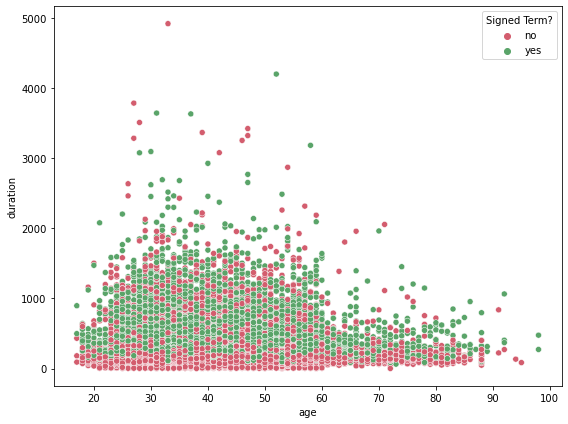

In [14]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
sns.scatterplot(x = df['age'], y = df['duration'], hue = df['y'], palette = color_dict)

plt.legend(title = 'Signed Term?', loc = 'upper right')
plt.tight_layout()
plt.show()

Not necesseraly, dataset shows no correlation between **age** and call **duration**. But does it relato to convertion rates?

---

### What is the influence of macroeconomics in the conversion rate?

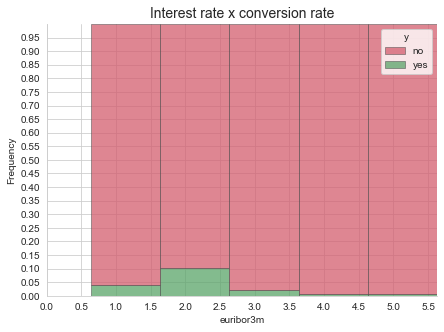

In [112]:
import matplotlib as mpl
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=df,
    x="euribor3m", hue="y",
    multiple="fill",
    palette=color_dict,
    edgecolor=".3",
    linewidth=.5,
    stat='frequency',
    binwidth=1,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(np.arange(0,6,0.5))
ax.set_yticks(np.arange(0,1,0.05))

plt.title('Interest rate x conversion rate', fontsize = 14)
plt.show()

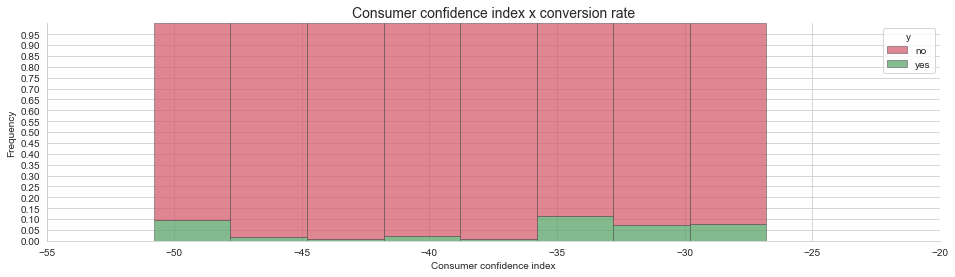

In [113]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(16, 4))
sns.despine(f)

sns.histplot(
    data=df,
    x='cons.conf.idx', hue="y",
    multiple="fill",
    palette=color_dict,
    edgecolor=".3",
    linewidth=.5,
    stat='frequency',
    binwidth = 3
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(np.arange(-55,-15,5))
ax.set_yticks(np.arange(0,1,0.05))
ax.set_xlabel('Consumer confidence index')
plt.title('Consumer confidence index x conversion rate', fontsize = 14)
plt.show()

It seems that interest rate is less than 3.5% per year convertion rate is considerably higher. And this should be noted at commercial team planning. 

As for consumer confidence, Portugal has a notable pessimism for it's economy ever since the eurozone crisis. But when consumer condidence is greater than -35, we have a uptick in sales. Perhaps the uptick in subscriptions when consumer confidence is an outlier, or has relation with decreasing of interest rate. 

---

## Predicting Success of Telemarketing Call

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

C:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [11]:
y_pred = classifier_lr.predict(X_test)

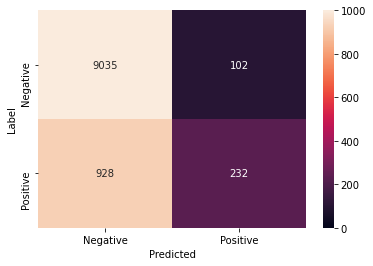

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.69      0.20      0.31      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



In [15]:
#Plotting the results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()
print(classification_report(y_test, y_pred))

### K-Means Classifier

We will use the Elbow Method to determine best number of clusters

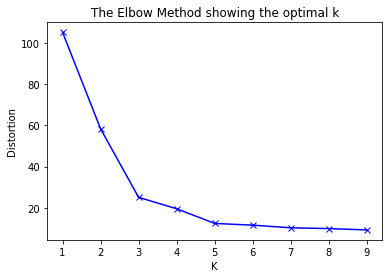

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can determine that the optimal number of neighbors is 5. 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = classifier_knn.predict(X_test)

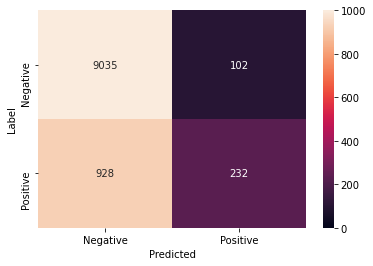

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.69      0.20      0.31      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



In [16]:
#Plotting the results

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

print(classification_report(y_test, y_pred))

### SVC

In [30]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'poly', random_state = 0, degree=1)
classifier_svm.fit(X_train, y_train)

SVC(degree=1, kernel='poly', random_state=0)

In [31]:
y_pred = classifier_svm.predict(X_test)

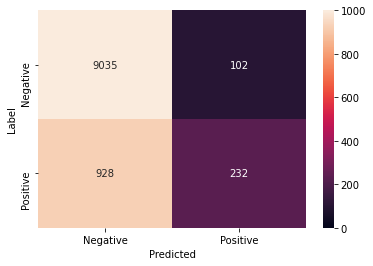

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.69      0.20      0.31      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



In [17]:
#Plotting the results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()
print(classification_report(y_test, y_pred))

### Naïve Bayes

In [33]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier_nb.predict(X_test)

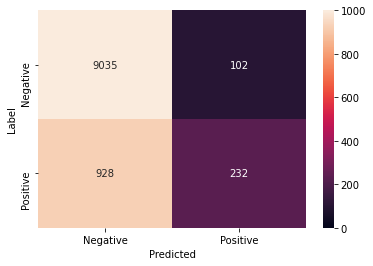

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.69      0.20      0.31      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



In [18]:
#Plotting the results

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()
print(classification_report(y_test, y_pred))

### Decision Tree

In [19]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

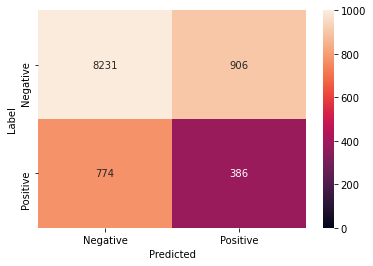

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9137
           1       0.30      0.33      0.31      1160

    accuracy                           0.84     10297
   macro avg       0.61      0.62      0.61     10297
weighted avg       0.84      0.84      0.84     10297



In [21]:
#Plotting the results
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

print(classification_report(y_test, y_pred))

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier_rt = RandomForestClassifier()

classifier_rt.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = classifier_rt.predict(X_test)

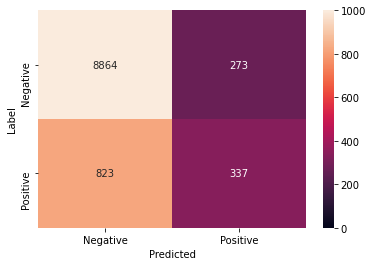

0.8935612314266291
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      9687
           1       0.29      0.55      0.38       610

    accuracy                           0.89     10297
   macro avg       0.63      0.73      0.66     10297
weighted avg       0.93      0.89      0.91     10297



In [44]:
#Plotting the results

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

print(classification_report(y_pred,y_test))

---

### Note that we have a problem with the amount of False Negatives, wich are actually the greater marjority of the Positive values pointed by the model. This is due to the imbalance of the dataset, since 'No' values are 9 times more prevalent than 'yes'. 

# Fixing bias introduced by an imbalanced dataset

## Addresing imbalance with SMOTE-NC

In [ ]:
#! pip install -U imbalanced-learn

We will use the imbalanced-learn library to address the dataset imbalance. 

In [2]:
from sklearn.preprocessing import LabelEncoder

df_smote = df.copy() #Starting with a copy of the original dataset
df_smote.drop(columns=['day_of_week', 'duration'], inplace = True) #dropping columns that we already determined to be excluded from the study

le = LabelEncoder()
df_smote['y'] = le.fit_transform(df_smote['y'])
col_y = df_smote.pop('y')
df_smote['y'] = col_y

X_smote = df_smote.iloc[:, :-1].values
y_smote = df_smote.iloc[:, -1].values


In [4]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cont_variables = [0,9,10,11,13,14,15,16,17]
for i in cont_variables:
  ct = ColumnTransformer([('ct', StandardScaler(), [i])], remainder='passthrough')
  ct.fit_transform(X_smote)

from sklearn.model_selection import train_test_split
X_imb, X_t, y_imb, y_t = train_test_split(X_smote, y_smote, test_size = 0.25, stratify = y_smote)

In [10]:
X_imb = pd.DataFrame(X_imb, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']) #we need to convert X_imb back to dataframe to work with the SMOTE algorithm

X_imb.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,50,entrepreneur,married,university.degree,no,no,no,cellular,nov,1,999,1,failure,-0.1,93.2,-42.0,4.191,5195.8
1,50,blue-collar,divorced,high.school,no,no,no,telephone,may,6,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
2,36,blue-collar,single,basic.6y,unknown,no,no,cellular,jul,2,999,0,nonexistent,1.4,93.918,-42.7,4.96,5228.1
3,33,admin.,married,university.degree,no,yes,no,cellular,jun,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2
4,43,management,married,university.degree,no,no,yes,cellular,nov,2,999,1,failure,-0.1,93.2,-42.0,4.12,5195.8


SMOTE is an oversampling technique that uses the KNN method to create synthetic data points of the minority class. 

In [11]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([0,1,2,3,4,5,6,7,8,12], sampling_strategy=1.0) #We will use a 1:1 sampling strategy
X_oversample, y_oversample = smotenc.fit_resample(X_imb, y_imb)

In [12]:
X_oversample = pd.DataFrame(X_oversample, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])#Converting X_oversample back to dataframe so we can encode categorical columns

In [13]:
X_oversample = pd.get_dummies(X_oversample, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [14]:
y_imb.mean()

0.11265417111780131

In [15]:
y_oversample.mean()

0.5

Note that with the use of the SMOTE-NC method the 'yes' target value has increased from 11% of the dataset to 50%.


## Tunning Hyperparameters with randomized search

### Defining parameter grid

In [4]:
#Defining some number of samples to be tested, after the best parameters are defined, we can refine this variable to achive more optimized results
rt_n_estimators = [10, 100, 500, 1000]
#This variables changes the way our model will evaluate a quality of each split, there are two methods: gini and entropy. More details on each method in sklearn docs.
rt_criterion = ['gini', 'entropy']
#Now we determine the range values for the minimum number of samples required to split a node
rt_min_samples_split = [2, 5, 7, 9]
#Range of values that will be the requirement for a node be considered a leaf node. Has the effect of smoothing the model.
rt_min_samples_leaf = [1, 2, 4, 6]
#Range for the number of features to evaluate which is the best split. For the details on each method, check sklearn docs. 
rt_max_features = ['auto', 'sqrt', 'log2', None]
#wheter bootstrap samples are used or not
rt_bootstrap = [True, False]
#if bootstrap = True, decide if wheter or not use out-of-bag samples to calculate the generalization score
rt_oob_score = [True, False]
#experimenting with this parameter
rt_max_samples = [None,0.5, 2, 4]

#Creating random grid

random_grid = {
    'n_estimators': rt_n_estimators,
    'criterion': rt_criterion,
    'min_samples_split': rt_min_samples_split,
    'min_samples_leaf': rt_min_samples_leaf,
    'max_features': rt_max_features,
    'bootstrap': rt_bootstrap,
    'oob_score': rt_oob_score,
    'max_samples': rt_max_samples
}

print(random_grid)

{'n_estimators': [10, 100, 500, 1000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6], 'max_features': ['auto', 'sqrt', 'log2', None], 'bootstrap': [True, False], 'oob_score': [True, False], 'max_samples': [None, 0.5, 2, 4]}


### Finding the best parameters with Randomized Search

Randomized search tests a sample of the combination of parameters defined in the parameter grid and finds which has the best fit according to the scoring method defined. We will opt for f1 score since precision is heavily influenced by '0' class, and our objective is to avoid False Negatives.

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#Creating classifier
rt = RandomForestClassifier(n_jobs = 1, class_weight={0:.1, 1:.9})#since 0 is 9x more prevalent than 1 in the dataset, we adjust the class_weight accordingly
rt_random_search = RandomizedSearchCV(estimator = rt, param_distributions = random_grid, n_iter = 400, cv = 5, verbose=0, n_jobs = 2, error_score=0.0, scoring='f1')#we use f1 score instead of to avoid model overfitting to y=0

In [70]:
#searching for the best parameters

rt_random_search.fit(X_oversample, y_oversample)

RandomizedSearchCV(cv=5, error_score=0.0,
                   estimator=RandomForestClassifier(class_weight={0: 0.1,
                                                                  1: 0.9},
                                                    n_jobs=1),
                   n_iter=400, n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_samples': [None, 0.5, 2, 4],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 7, 9],
                                        'n_estimators': [10, 100, 500, 1000],
                                        'oob_score': [True, False]},
                   scoring='f1')

In [ ]:
from joblib import dump
dump(rt_random_search.best_params_, 'clf.joblib')

The best parameters selected by the RandomSearchCV algorithm are:

In [71]:
print(rt_random_search.best_params_)

{'oob_score': True, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': None, 'criterion': 'entropy', 'bootstrap': True}


In [5]:
X_t = pd.DataFrame(X_t, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed'])

In [6]:
X_t = pd.get_dummies(data=X_t, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [20]:
#predicting results using test set
#note: by using random search, our model retains the best parameters which also can be accessed with .best_parameters_ property.
y_pred = rt_random_search.predict(X_t)

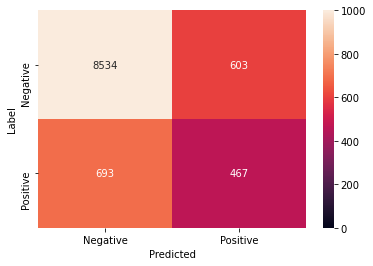

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
# Making the Confusion Matrix
cm = confusion_matrix(y_t, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

In [24]:
print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9137
           1       0.44      0.40      0.42      1160

    accuracy                           0.87     10297
   macro avg       0.68      0.67      0.67     10297
weighted avg       0.87      0.87      0.87     10297



We can still try to improve the number of TP adjusting the decision treshold from the model from 0.5 (standard) to a more suitable probability. 

## Trying to reduce False negatives further with adjusting the decision treshold

In [53]:
y_pred_prob = (rt_random_search.predict_proba(X_t)[:,1] >= 0.20).astype(bool) #The model will only classify a customer as a probable 'no sell' if it has 80% change of not subscribing, less than that and is classified as positive. 

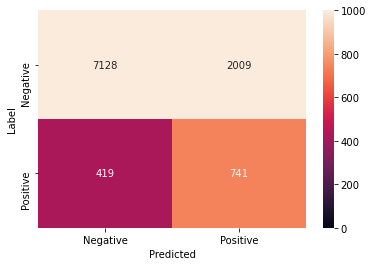

In [54]:
# Plotting the Confusion Matrix
cm = confusion_matrix(y_t, y_pred_prob)
sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', vmax = 1000, vmin =0, fmt = 'g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

In [50]:
print(classification_report(y_t, y_pred_prob))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      9137
           1       0.27      0.63      0.38      1160

    accuracy                           0.77     10297
   macro avg       0.61      0.71      0.62     10297
weighted avg       0.87      0.77      0.81     10297



Note the trade that was made, we increased the number of false positives, but considerably reduce the amount of false negatives. The company has to decide what is the balance of FP and FN that is acceptable to them. 

---

# Conclusion

### What we can conclude from the dataset?

 - The marjority of customers that subscribed to the terms are 65+ years.
 - Students and retired customers have the most chance to subscribe. 
  > Need to take this into account when planning marketing campaigns. 
 - Peolpe holding university or professional degrees have more chance to subscribe.
  > This can shape how the scripts for the sales persons. 
 - Single customers have aprox. 30% more chance to subscribe.

 Some macro factors that influence conversion rates for the campaign:
 - Periods with low interest rates tend to be more succesful for this product. 
 - Conversion rates tend to increase with growth of consumer confidence. 
  > Management can use macroeconomics forecasts from the bank itself to improve planning. 
 - March, semptember, october and december are the best months for convertion. 
  > Management could increase incentives for the teams in those months, also could promote sprints and internal propaganda.

  In regards to the prediction model, the recommendation is that it has to be retrained at a later date, with a greater quantity of positive results. 

  We tried Randomized search, used smote techniques and adjusted the decision treshold to a very aggresive level, the amount of False Negatives is around 47% of total True Positives amount. Taking more steps to compensate for class imbalance can greatly increase the number of False positives, increasing costs with callcenters, which probably is the opposite effect desired by this study. 

  Finally, is up to the management to figure out the ratio of TP/FN that is acceptable to reduce the amount of FN. 